# **Capstone project: Providing data-driven suggestions for HR**

## Description and deliverables

This capstone project is an opportunity for you to analyze a dataset and build predictive models that can provide insights to the Human Resources (HR) department of a large consulting firm.

Upon completion, you will have two artifacts that you would be able to present to future employers. One is a brief one-page summary of this project that you would present to external stakeholders as the data professional in Salifort Motors. The other is a complete code notebook provided here. Please consider your prior course work and select one way to achieve this given project question. Either use a regression model or machine learning model to predict whether or not an employee will leave the company. The exemplar following this actiivty shows both approaches, but you only need to do one.

In your deliverables, you will include the model evaluation (and interpretation if applicable), a data visualization(s) of your choice that is directly related to the question you ask, ethical considerations, and the resources you used to troubleshoot and find answers or solutions.


# **PACE stages**


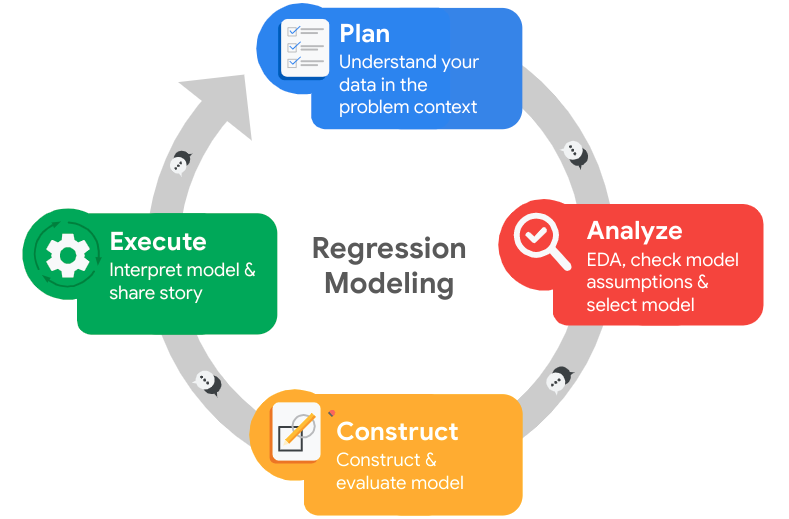

## **Pace: Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.

In this stage, consider the following:

### Understand the business scenario and problem

The HR department at Salifort Motors wants to take some initiatives to improve employee satisfaction levels at the company. They collected data from employees, but now they don’t know what to do with it. They refer to you as a data analytics professional and ask you to provide data-driven suggestions based on your understanding of the data. They have the following question: what’s likely to make the employee leave the company?

Your goals in this project are to analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company.

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset

The dataset that you'll be using in this lab contains 15,000 rows and 10 columns for the variables listed below. 

**Note:** you don't need to download any data to complete this lab. For more information about the data, refer to its source on [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv).

Variable  |Description |
-----|-----|
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

💭
### Reflect on these questions as you complete the plan stage.

*  Who are your stakeholders for this project?
- What are you trying to solve or accomplish?
- What are your initial observations when you explore the data?
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)
- Do you have any ethical considerations in this stage?




[Double-click to enter your responses here.]

## Step 1. Imports

*   Import packages
*   Load dataset



### Import packages

In [52]:
# Import packages
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, ConfusionMatrixDisplay, confusion_matrix, roc_auc_score, roc_curve
from xgboost import XGBClassifier, plot_importance
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import pearsonr, spearmanr
from sklearn.preprocessing import PolynomialFeatures

import pickle

### Load dataset

`Pandas` is used to read a dataset called **`HR_capstone_dataset.csv`.**  As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [53]:
# RUN THIS CELL TO IMPORT YOUR DATA. 

# Load dataset into a dataframe
### YOUR CODE HERE ###
df0 = pd.read_csv("HR_capstone_dataset.csv")


# Display first few rows of the dataframe
df = df0.copy()
df.head()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Step 2. Data Exploration (Initial EDA and data cleaning)

- Understand your variables
- Clean your dataset (missing data, redundant data, outliers)



### Gather basic information about the data

In [54]:
# Gather basic information about the data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [55]:
# Gather descriptive statistics about the data
df.describe(include="all")


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999,14999
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sales,low
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4140,7316
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,NaN,NaN
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,NaN,NaN
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,NaN,NaN


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [56]:
# Display all column names
df.columns


Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [57]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [58]:
# Rename columns as needed
df.columns = ['satisfaction_level', 'last_evaluation', 'num_projects',
       'avg_monthly_hrs', 'time_spent', 'work_accident', 'left',
       'promoted_last_5years', 'department', 'salary']


# Display all column names after the update
df.columns


Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'avg_monthly_hrs', 'time_spent', 'work_accident', 'left',
       'promoted_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [59]:
# Check for missing values
df.isna().sum()


satisfaction_level      0
last_evaluation         0
num_projects            0
avg_monthly_hrs         0
time_spent              0
work_accident           0
left                    0
promoted_last_5years    0
department              0
salary                  0
dtype: int64

### Check duplicates

Check for any duplicate entries in the data.

In [60]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'num_projects',
       'avg_monthly_hrs', 'time_spent', 'work_accident', 'left',
       'promoted_last_5years', 'department', 'salary'],
      dtype='object')

In [61]:
# Check for duplicates
num_of_dups = df.duplicated().sum()
print(f"The number of duplicate rows is {num_of_dups}")


The number of duplicate rows is 3008


In [62]:
# Inspect some rows containing duplicates as needed
df[df.duplicated()].head(10)


,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_spent,work_accident,left,promoted_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low
1516,0.40,0.50,2,127,3,0,1,0,IT,low
1616,0.37,0.46,2,156,3,0,1,0,sales,low
1696,0.39,0.56,2,160,3,0,1,0,sales,low
1833,0.10,0.85,6,266,4,0,1,0,sales,low
12000,0.38,0.53,2,157,3,0,1,0,sales,low


In [63]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df = df.drop_duplicates()


# Display first few rows of new dataframe as needed
df.head()


,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_spent,work_accident,left,promoted_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### Check outliers

Check for outliers in the data.

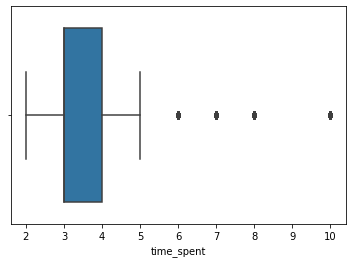

In [65]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
sns.boxplot(df["time_spent"])



In [14]:
# Determine the number of rows containing outliers
num_of_outl_yrs = len(df[df["time_spent"]>5])
print(f"The number of employees who worked for more than 5 years in the company is {num_of_outl_yrs}")



The number of employees who worked for more than 5 years in the company is 824


Text(0.5, 1.0, 'Number of Workers in Each Department by Salary Level')

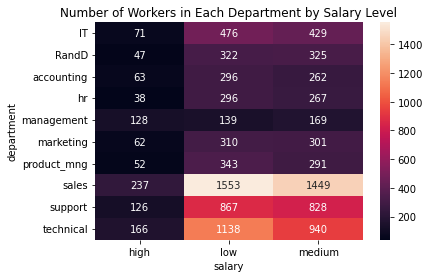

In [75]:
table = pd.crosstab(df["department"], df["salary"])
sns.heatmap(table, annot=True, fmt='.0f')
plt.title("Number of Workers in Each Department by Salary Level")

Certain types of models are more sensitive to outliers than others. When you get to the stage of building your model, consider whether to remove outliers, based on the type of model you decide to use.

# pAce: Analyze Stage
- Perform EDA (analyze relationships between variables)



## Step 2. Data Exploration (Continue EDA)

Begin by understanding how many employees left and what percentage of all employees this figure represents.

In [15]:
# Get numbers of people who left vs. stayed
display(df["left"].value_counts())

# Get percentages of people who left vs. stayed
df["left"].value_counts(normalize=True)


0    10000
1     1991
Name: left, dtype: int64

0    0.833959
1    0.166041
Name: left, dtype: float64

### Data visualizations

Now, examine variables that you're interested in, and create plots to visualize relationships between variables in the data.

In [16]:
df.head(1)

,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_spent,work_accident,left,promoted_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low


Text(0.5, 1.0, 'Average Satisfaction Level by the Years of Tenure')

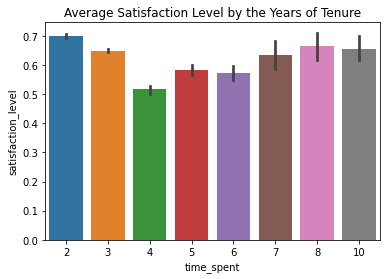

In [17]:
# Create a plot as needed
sns.barplot(x="time_spent", y="satisfaction_level", data=df)
plt.title("Average Satisfaction Level by the Years of Tenure")


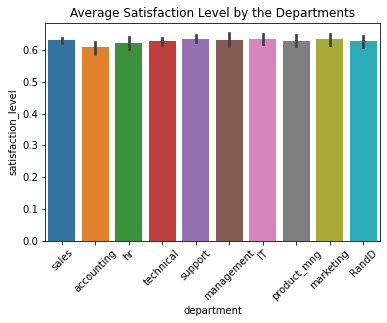

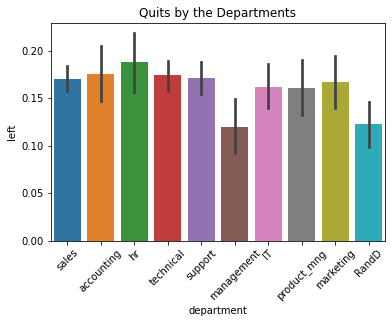

In [18]:
# Create a plot as needed
sns.barplot(x="department", y="satisfaction_level", data=df)
plt.title("Average Satisfaction Level by the Departments")
plt.xticks(rotation=45)
plt.show()
plt.clf()

sns.barplot(x="department", y="left", data=df)
plt.title("Quits by the Departments")
plt.xticks(rotation=45)
plt.show()

Text(0.5, 1.05, 'Seemingly, there is no correlation...')

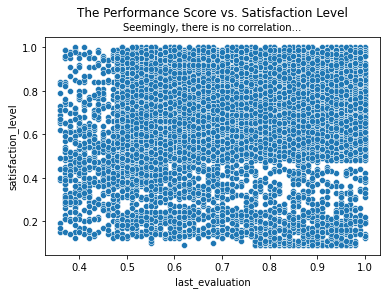

In [19]:
# Create a plot as needed
sns.scatterplot(x="last_evaluation", y="satisfaction_level", data=df)
plt.title("The Performance Score vs. Satisfaction Level", y=1.07)
plt.text(0.5, 1.05, "Seemingly, there is no correlation...", ha='center', va='center', transform=plt.gca().transAxes, fontsize=10)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

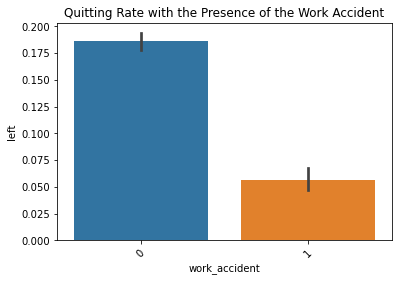

In [20]:
# Create a plot as needed
sns.barplot(x="work_accident", y="left", data=df)
plt.title("Quitting Rate with the Presence of the Work Accident")
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

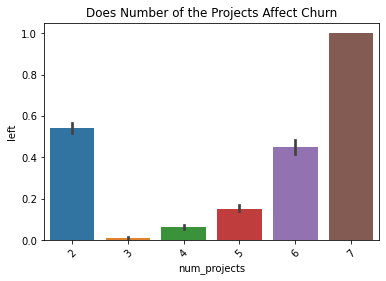

In [21]:
# Create a plot as needed
sns.barplot(x="num_projects", y="left", data=df)
plt.title("Does Number of the Projects Affect Churn")
plt.xticks(rotation=45)


In [22]:
df["num_projects"].value_counts()

4    3685
3    3520
5    2233
2    1582
6     826
7     145
Name: num_projects, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

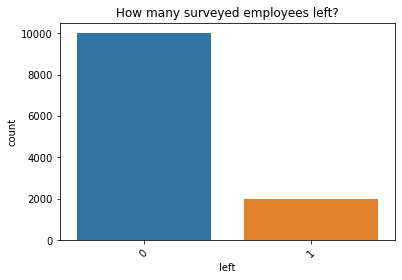

In [23]:
# Create a plot as needed
sns.countplot(x="left", data=df)
plt.title("How many surveyed employees left?")
plt.xticks(rotation=45)



(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

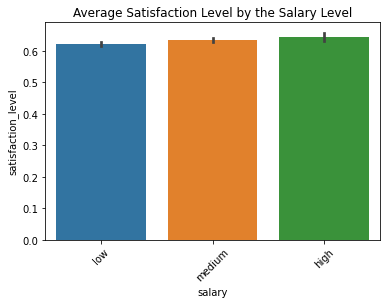

In [24]:
# Create a plot as needed
sns.barplot(x="salary", y="satisfaction_level", data=df)
plt.title("Average Satisfaction Level by the Salary Level")
plt.xticks(rotation=45)


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

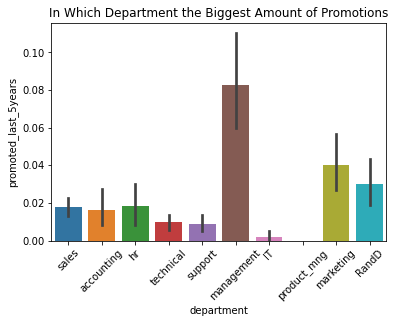

In [25]:
# Create a plot as needed
sns.barplot(x="department", y="promoted_last_5years", data=df)
plt.title("In Which Department the Biggest Amount of Promotions")
plt.xticks(rotation=45)


### Dummy encode categorical variables

In [26]:
df = pd.get_dummies(df)

### Insights

1. HR, marketing and sales departments experience the most significant employees' leakage
2. There are not so many employees who left - 5 times less than those who stayed
3. The number of projects over 5 could affect the likelihood of the person's churn negatively for the company

# paCe: Construct Stage
- Determine which models are most appropriate
- Construct the model
- Confirm model assumptions
- Evaluate model results to determine how well your model fits the data


In [27]:
df.head(1)

,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_spent,work_accident,left,promoted_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [28]:
X = df.drop("left", axis=1)
y = df["left"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Prioritize recall to capture all leavers

In [29]:
rf = RandomForestClassifier(random_state=42, class_weight = "balanced")
xgb = XGBClassifier(scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train), random_state=42)
scoring = {"accuracy", "f1", "precision", "recall"}
cv_params_rf = {
    'n_estimators': [10, 50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],    # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],    # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],     # Minimum number of samples required to be at a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider for the best split
    'bootstrap': [True, False] # Whether bootstrap samples are used when building trees
}

cv_params_xgb = {
    'n_estimators': [100, 200, 300],  # Number of boosting rounds
    'max_depth': [3, 4, 5],          # Maximum depth of each tree
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'subsample': [0.8, 0.9, 1.0],    # Fraction of samples used for fitting the trees
    'min_child_weight': [1, 2, 3],    # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2],           # Minimum loss reduction required to make a further partition on a leaf node
    'colsample_bytree': [0.8, 0.9, 1.0]  # Fraction of features used for building each tree
}
#rf_cv = GridSearchCV(rf, cv_params_rf, scoring = scoring, refit="recall")
#xgb_cv = GridSearchCV(xgb, cv_params_xgb, scoring = scoring, refit="recall")

In [30]:
#%%time
#rf_cv.fit(X_train, y_train)

In [31]:
#%%time
#xgb_cv.fit(X_train, y_train)

In [32]:
def write_pickle(model,name:str):
    """
    Takes model object - model, its name(string) - name and saves the model locally
    """
    with open(name, 'wb') as model_file:
        pickle.dump(model, model_file)

In [33]:
#write_pickle(rf_cv, "rand_for.pkl")
#write_pickle(xgb_cv, "xgboost_class.pkl")

In [34]:
def read_pickle(name:str):
    with open(name, 'rb') as model_file:
        loaded_model = pickle.load(model_file)
    return loaded_model

In [35]:
rf_cv = read_pickle("rand_for.pkl")

In [36]:
xgb_cv = read_pickle("xgboost_class.pkl")

🔎
## Recall model assumptions

**Logistic Regression model assumptions**
- Outcome variable is categorical
- Observations are independent of each other
- No severe multicollinearity among X variables
- No extreme outliers
- Linear relationship between each X variable and the logit of the outcome variable
- Sufficiently large sample size





In [37]:
df.corr()

,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_spent,work_accident,left,promoted_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
satisfaction_level,1.000000,0.095186,-0.133246,-0.006252,-0.152915,0.039940,-0.350558,0.019789,0.005382,-0.002552,...,-0.007348,0.001883,0.005171,0.000171,0.004268,0.009064,-0.003426,0.017031,-0.027838,0.018579
last_evaluation,0.095186,1.000000,0.270256,0.264678,0.096829,-0.005695,0.013520,-0.007206,-0.002885,-0.005448,...,-0.001354,0.011106,0.002546,-0.004233,-0.022711,0.015876,0.008859,-0.017543,0.010416,-0.000755
num_projects,-0.133246,0.270256,1.000000,0.331516,0.188837,-0.005612,0.030928,-0.000544,-0.001464,0.010077,...,-0.025142,0.005729,-0.017232,-0.001777,-0.013473,0.006594,0.023235,-0.002820,-0.000914,0.002484
avg_monthly_hrs,-0.006252,0.264678,0.331516,1.000000,0.102875,-0.012860,0.070409,-0.004964,0.001007,0.004159,...,-0.005197,0.004211,-0.004935,-0.007987,-0.002890,0.001334,0.006321,-0.002499,-0.000675,0.002065
time_spent,-0.152915,0.096829,0.188837,0.102875,1.000000,0.000003,0.173295,0.056828,-0.003233,-0.008380,...,-0.018757,0.090071,0.010474,-0.004398,0.007233,-0.022955,-0.020051,0.029111,-0.032541,0.016612
work_accident,0.039940,-0.005695,-0.005612,-0.012860,0.000003,1.000000,-0.125436,0.029852,-0.009777,0.011793,...,-0.013463,0.005837,0.004181,0.003144,-0.000895,0.011613,-0.004268,0.002735,0.001580,-0.003108
left,-0.350558,0.013520,0.030928,0.070409,0.173295,-0.125436,1.000000,-0.044657,-0.003324,-0.029016,...,0.013567,-0.024417,0.000248,-0.003768,0.006154,0.006019,0.010000,-0.094769,0.099113,-0.047214
promoted_last_5years,0.019789,-0.007206,-0.000544,-0.004964,0.056828,0.029852,-0.044657,1.000000,-0.034334,0.025610,...,0.002446,0.098835,0.043833,-0.032326,0.004609,-0.026709,-0.026502,0.063982,-0.076576,0.041601
department_IT,0.005382,-0.002885,-0.001464,0.001007,-0.003233,-0.009777,-0.003324,-0.034334,1.000000,-0.073779,...,-0.068377,-0.057822,-0.072586,-0.073326,-0.181086,-0.125958,-0.142826,-0.010617,0.005370,0.000482
department_RandD,-0.002552,-0.005448,0.010077,0.004159,-0.008380,0.011793,-0.029016,0.025610,-0.073779,1.000000,...,-0.056934,-0.048146,-0.060439,-0.061056,-0.150782,-0.104880,-0.118925,-0.013363,-0.007301,0.014761


💭
### Reflect on these questions as you complete the constructing stage.

- Do you notice anything odd?

Overall, everything is normal
- Which independent variables did you choose for the model and why?

I chose all of of available predictor variables as they all will be known next time when the target variable is still to be predicted
- Are each of the assumptions met?

Yes, tthe assumptions are met and thanks to user-friendliness of RandomForestClassifier and XGBClassifier there were less requirements to data which they are fed with to meet.
- How well does your model fit the data?

The metrics claim that it does very well, not overfitting the model at the same time.
- Can you improve it? Is there anything you would change about the model?

Plausibly, the performance could be improved but the numbers of 0.9+ in all metrics are more than satisfiable
- What resources do you find yourself using as you complete this stage? (Make sure to include the links.)

Actually, just my knowledge. And StackOverflow(https://stackoverflow.com/) and ChatGPT(https://chat.openai.com) sometimes)
- Do you have any ethical considerations in this stage?

So far everything is legit


## Step 3. Model Building, Step 4. Results and Evaluation
- Fit a model that predicts the outcome variable using two or more independent variables
- Check model assumptions
- Evaluate the model

### Identify the type of prediction task.

Logistic binary

### Identify the types of models most appropriate for this task.

XGBoost Classifier and Random Forest Classifier

### Modeling

Add as many cells as you need to conduct the modeling process.

In [38]:
### YOUR CODE HERE ###


# pacE: Execute Stage
- Interpret model performance and results
- Share actionable steps with stakeholders



✏
## Recall evaluation metrics

- **AUC** is the area under the ROC curve; it's also considered the probability that the model ranks a random positive example more highly than a random negative example.
- **Precision** measures the proportion of data points predicted as True that are actually True, in other words, the proportion of positive predictions that are true positives.
- **Recall** measures the proportion of data points that are predicted as True, out of all the data points that are actually True. In other words, it measures the proportion of positives that are correctly classified.
- **Accuracy** measures the proportion of data points that are correctly classified.
- **F1-score** is an aggregation of precision and recall.






In [39]:
print(f"Best recall score of the Random Forest Classifier: {rf_cv.best_score_:.2f}")
print(f"Best recall score of the XGBoost Classifier: {xgb_cv.best_score_:.2f}")

Best recall score of the Random Forest Classifier: 0.92
Best recall score of the XGBoost Classifier: 0.94


In [40]:
xgb_best = xgb_cv.best_estimator_

In [41]:
df.head()

,satisfaction_level,last_evaluation,num_projects,avg_monthly_hrs,time_spent,work_accident,left,promoted_last_5years,department_IT,department_RandD,...,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0.80,0.86,5,262,6,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.11,0.88,7,272,4,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
3,0.72,0.87,5,223,5,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0.37,0.52,2,159,3,0,1,0,0,0,...,0,0,0,0,1,0,0,0,1,0


### XGBoost shows better results so we will check it out on the test yet unseen data

In [42]:
y_hat_xgb = xgb_best.predict(X_test)

In [43]:
type(xgb_best)

xgboost.sklearn.XGBClassifier

In [44]:
accuracy_xgb = accuracy_score(y_hat_xgb, y_test)
recall_xgb = recall_score(y_hat_xgb, y_test)
f1_xgb = f1_score(y_hat_xgb, y_test)
precision_xgb = accuracy_score(y_hat_xgb, y_test)
auc_roc = roc_auc_score(y_test, y_hat_xgb)

print(f"Accuracy score is {accuracy_xgb:.2f}")
print(f"Recall score is {recall_xgb:.2f}")
print(f"F1 score is {f1_xgb:.2f}")
print(f"Precision score is {precision_xgb:.2f}")
print(f'AUC-ROC Score: {auc_roc:.2f}')

Accuracy score is 0.97
Recall score is 0.91
F1 score is 0.92
Precision score is 0.97
AUC-ROC Score: 0.96


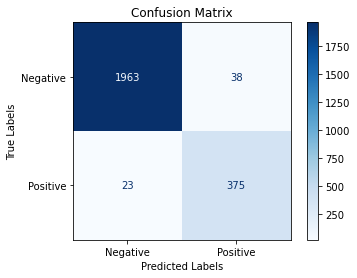

In [45]:
conf_matrix = confusion_matrix(y_test, y_hat_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['Negative', 'Positive'])
disp.plot(cmap='Blues', values_format='d')  # You can customize the colormap and format as desired
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [46]:
auc_roc = roc_auc_score(y_test, y_hat_xgb)

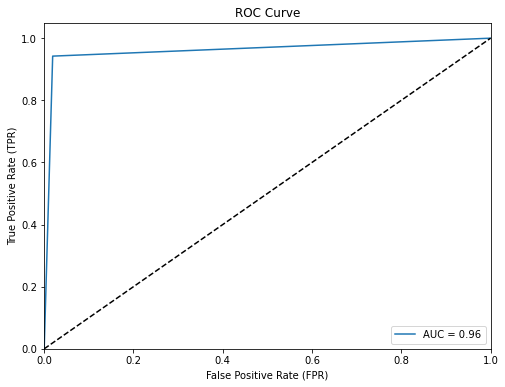

In [47]:
fpr, tpr, thresholds = roc_curve(y_test, y_hat_xgb)

# Visualize the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

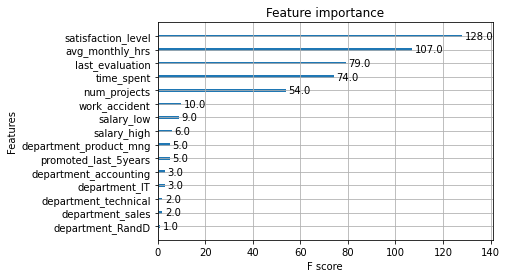

In [48]:
plot_importance(xgb_best)

### Insights
The most influential factors which determine whther the employee leave or not are his satisfaction level and average number of hours the employee work per hour.

In addition to this, the score he gets on the last evaluation as well as time spent in the company and number of projects an employee works on matter.

Correlation of the introduced important features explained:
1. Higher satisfaction = lower churn
2. More hours per month = higher churn
3. In fact, no direct correlation between last evaluation score(probably, polynomial correlation has the place to be)
4. More time in the company - higher churn(illogical, nevertheless, the numbers do not lie)
5. Weak correlation with the number of projects, but more projects higher churn's chance

# Steps to undertake for managers 

1. Put the model in the production


2. When ther model shows that the employee is likely to leave the company pay particular attention to it and investigate his data. 


3. Take a closer look at those the most impactful attributes(satisfaction level, average monthly hours, last evaluation score, number of project being worked on and the time spent in the company overall)

## Step 4. Results and Evaluation
- Interpret model
- Evaluate model performance using metrics
- Prepare results, visualizations, and actionable steps to share with stakeholders




### Summary of model results


Great performance of the model! It is set to prioritize recall so it is more sensitive in the detection of the employees who possibly can leave the company. In other words, the model is rather likely to identify the employee as the leaver if it has doubts. Therefore, those who are identified as non-leavers, we can be confident about that they will stay in the company and we are less likely to miss the person who is potential leaver sometimes even overcaring about the person's likelihood of staying. 

Addtionally AUC-ROC metric of 0.96 is a robust indicator of that the model's prediction is much more effective than the random guessing

### Conclusion, Recommendations, Next Steps

Now the main technical part of the project is over. The next stage is observation and ensuring of the reliability of the model's results in real world. Particularly in this project, whether the surveyed employees really quit or do not quit as the model predicts

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged.

# ------------------------------------------Other Stuff-------------------------------------------------------

## Exploration of the possible polynomial correlation between leaving and last evaluation score

In [54]:
# Assuming X is your predictor variable (0 to 1)
eval_ = X["last_evaluation"]
poly = PolynomialFeatures(degree=2)  # You can change the degree as needed
X_poly = poly.fit_transform(eval_.to_numpy().reshape(-1,1))  # Reshape X if needed

In [61]:
display(type(X_poly))
type(y.values)

numpy.ndarray

numpy.ndarray

In [56]:
y

0        1
1        1
2        1
3        1
4        1
        ..
11995    0
11996    0
11997    0
11998    0
11999    0
Name: left, Length: 11991, dtype: int64

In [63]:
# Calculate Pearson correlation
pearson_corr, _ = pearsonr(y.values, X_poly)

# Calculate Spearman correlation
spearman_corr, _ = spearmanr(y.values, X_poly)

TypeError: No loop matching the specified signature and casting was found for ufunc add

In [67]:
# Calculate Pearson correlation coefficient
correlation_coefficient = np.corrcoef(X_poly, y.values)[0, 1]

ValueError: all the input array dimensions for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 3 and the array at index 1 has size 11991